In [1]:
import numpy as np

# Exploring fancy indexing

In [2]:
from numpy import random
rng=random.default_rng(42)
x=rng.integers(100,size=10)
x

array([ 8, 77, 65, 43, 43, 85,  8, 69, 20,  9], dtype=int64)

In [3]:
[x[3],x[7],x[2]] # to access 3 different elements

[43, 69, 65]

In [4]:
# alternative approach
ind = [3,7,4] # these are the indices
x[ind]

array([43, 69, 43], dtype=int64)

In [5]:
# shape of rslt reflects shape of index arrays
ind = np.array([[3,7],
               [4,5]])
x[ind]

array([[43, 69],
       [43, 85]], dtype=int64)

In [6]:
x = np.arange(12).reshape((3,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
row = np.array([0,1,2])
col = np.array([2,1,3])
x[row,col]

array([ 2,  5, 11])

first value in the result is <mark>x[0,2]</mark>,2nd value is <mark>x[1,1]</mark> and the third is <mark>x[2,3]</mark>.The pairing of indices in fancy indexing follows all the broadcasting rules.

In [8]:
x[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [9]:
row[:,np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

# Combined Indexing

In [10]:
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [11]:
# we can combine fancy with simple indexing
x[2,[2,0,1]]

array([10,  8,  9])

In [12]:
x[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [13]:
# fancy indexing with masking
mask = np.array([1,0,1,0],dtype=bool)
x[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

# Example: Selecting Random Points

One common use of fancy indexing is the selection of subsets of rows from a matrix.

In [14]:
mean = [0,0]
cov = [[1,2],
      [2,5]]
x = np.random.multivariate_normal(mean,cov,100)
x.shape

(100, 2)

The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and covariance matrix.

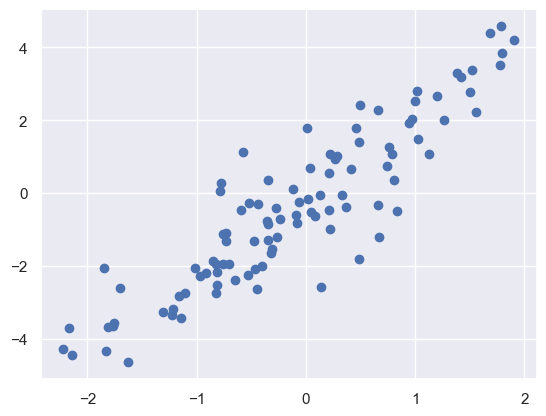

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styline
plt.scatter(x[:,0],x[:,1]);

In [16]:
# using fancy indexing to select 20 random points.
indices = np.random.choice(x.shape[0],20,replace=False)
indices

array([51, 98, 17, 14, 87, 89, 48,  8, 27, 31,  3, 15, 76, 35, 73,  7, 75,
        1, 23, 53])

In [17]:
selection = x[indices]
selection.shape

(20, 2)

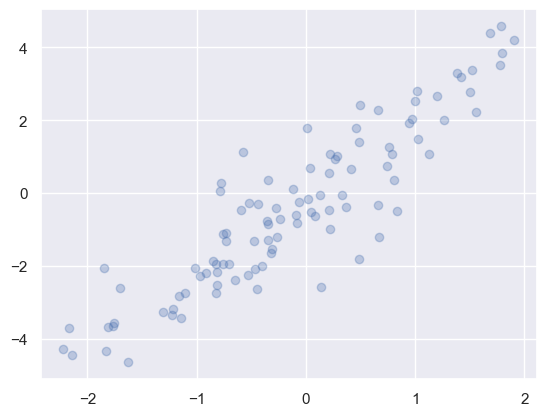

In [18]:
# to see which points are selected
plt.scatter(x[:,0],x[:,1],alpha=0.3)
plt.scatter(selection[:,0],selection[:,1],facecolor='none',s=500);

# Modifying values with fancy indexing

In [19]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i]=99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [20]:
x[i] -=10 
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Repeated indices with these operations can cause some potentially unexpected results

In [21]:
x = np.zeros(10)
x[[0,0]] = [4,6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Where did the 4 go? The result of this operation is to first assign <mark>x[0] = 4</mark>, followed by <mark>x[0] = 6</mark>. The result, of course, is that <mark>x[0]</mark> contains the value 6.

Fair enough,

In [22]:
i =[2,3,3,4,4,4]
x[i] +=1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

You might expect that <mark>x[3]</mark> would contain the value 2, and <mark>x[4]</mark> would contain the value 3, as this is how many times each index is repeated. Why is this not the case? Conceptually, this is because <mark>x[i] += 1</mark> is meant as a shorthand of <mark>x[i] = x[i] + 1</mark>. <mark>x[i] + 1</mark> is evaluated, and then the result is assigned to the indices in x. With this in mind, it is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results.

 if you want the other behavior where the operation is repeated? For this, you can use the <mark>at()</mark> method of ufuncs 

In [35]:
x = np.zeros(10)
np.add.at(x,i,1) # inplcace 
x 

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

# Example : Bining Data

You can use these ideas to efficiently bin data to create a histogram by hand. For example, imagine we have 1,000 values and would like to quickly find where they fall within an array of bins. We could compute it using <mark>ufunc.at</mark> like this:

In [36]:
np.random.seed(42)
x = np.random.randn(100)
#compute hist by hand
bins=np.linspace(-5,5,20)
counts=np.zeros_like(bins)
#find the appropriate bin for each x
i = np.searchsorted(bins,x)
#add 1 to each of these bins
np.add.at(counts,i,1)

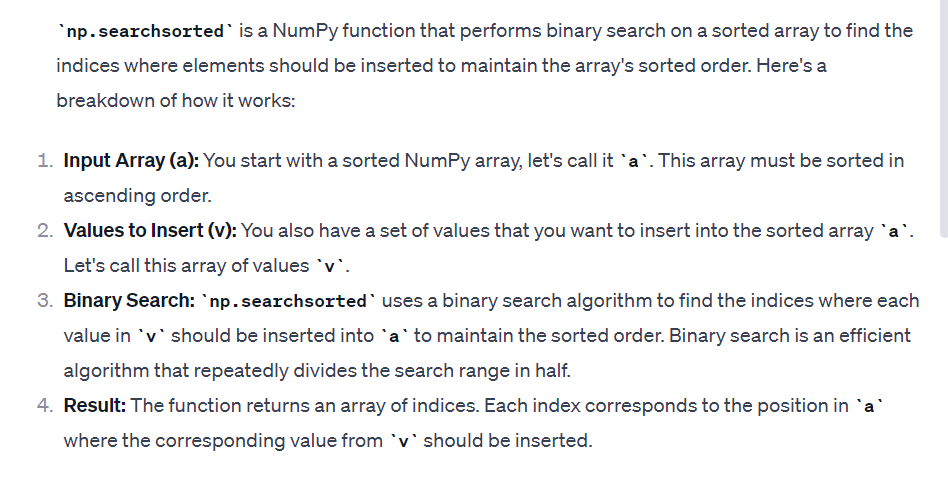

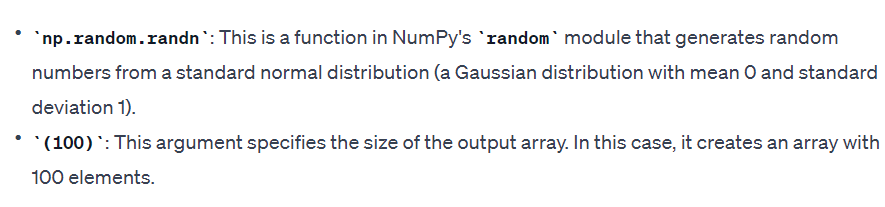

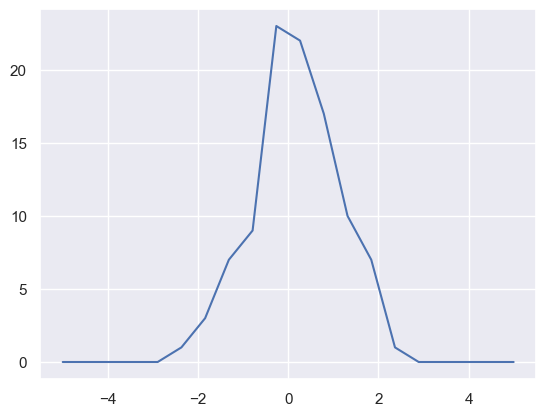

In [40]:
plt.plot(bins,counts);

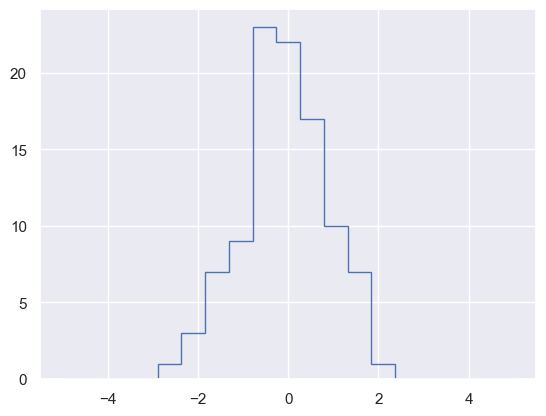

In [41]:
plt.hist(x,bins,histtype='step');

To compute the binning, matplotlib uses the <mark>np.histogram</mark> function, which does a very similar computation to what we did before. Let's compare the two here:

In [42]:
print('numpy routine:')
%timeit counts,edges = np.histogram(x,bins)

print("custom routine:")
%timeit np.add.at(counts,np.searchsorted(bins,x),1)

numpy routine:
20 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
custom routine:
13.4 µs ± 427 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [43]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
56.5 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
91.8 ms ± 8.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


What this comparison shows is that algorithmic efficiency is almost never a simple question. An algorithm efficient for large datasets will not always be the best choice for small datasets, and vice versa . But the advantage of coding this algorithm yourself is that with an understanding of these basic methods, you could use these building blocks to extend this to do some very interesting custom behaviors. The key to efficiently using Python in data-intensive applications is knowing about general convenience routines like <mark>np.histogram</mark> and when they're appropriate, but also knowing how to make use of lower-level functionality when you need more pointed behavior.

# Fast Sorting in Numpy: <mark>np.sort</mark> and <mark>np.argsort</mark>

Although Python has built-in sort and sorted functions to work with lists, we won't discuss them here because NumPy's <mark>np.sort</mark> function turns out to be much more efficient and useful for our purposes. By default <mark>np.sort</mark> uses an <b>O[NlogN]</b>
, quicksort algorithm, though mergesort and heapsort are also available. For most applications, the default quicksort is more than sufficient.

In [44]:
x=np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [45]:
# to sort in place
x.sort()
print(x)

[1 2 3 4 5]


In [46]:
x=np.array([2,1,4,3,5])
i=np.argsort(x) # returns the indices of the sorted elemens
print(i)

[1 0 3 2 4]


In [47]:
x[i]

array([1, 2, 3, 4, 5])

## Sorting along rows and columns

In [48]:
rng=random.default_rng(42)
x=rng.integers(0,10,(4,6))
x

array([[0, 7, 6, 4, 4, 8],
       [0, 6, 2, 0, 5, 9],
       [7, 7, 7, 7, 5, 1],
       [8, 4, 5, 3, 1, 9]], dtype=int64)

In [49]:
np.sort(x,axis=0)

array([[0, 4, 2, 0, 1, 1],
       [0, 6, 5, 3, 4, 8],
       [7, 7, 6, 4, 5, 9],
       [8, 7, 7, 7, 5, 9]], dtype=int64)

In [50]:
np.sort(x,axis=1)

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]], dtype=int64)

# Partial Sorts: Partitioning

Sometimes we're not interested in sorting the entire array, but simply want to find the k smallest values in the array.Numpy provides this in the <mark>np.partition</mark> function.<mark>np.partition</mark> takes an arrat and a number k; the result is a new array with the smallest k values to the left and the remaining values to the right,in arbitary order

In [51]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x,3)

array([2, 1, 3, 4, 6, 5, 7])

In [52]:
# along row and col
rng=random.default_rng(42)
x=rng.integers(0,10,(4,6))

In [53]:
np.partition(x,2,axis=1)

array([[0, 4, 4, 7, 6, 8],
       [0, 0, 2, 6, 5, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]], dtype=int64)

The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots.

Finally, just as there is a <mark>np.argsort</mark> that computes indices of the sort, there is a <mark>np.argpartition</mark> that computes indices of the partition. 

# Example: K-Nearest Neighbors

In [26]:
x = np.random.random((10,2))

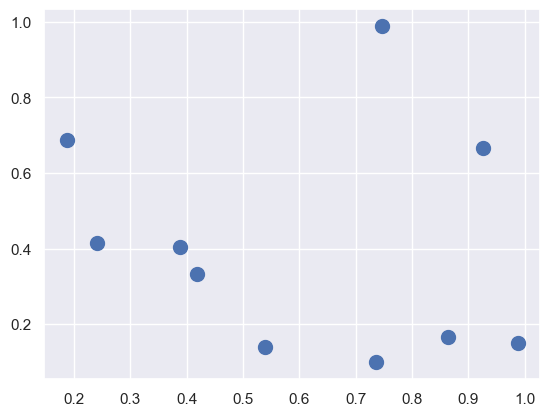

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(x[:,0],x[:,1],s=100)

Now we'll compute the distance between each pair of points

In [33]:
dist_sq =np.sum((x[:,np.newaxis,:]-x[np.newaxis,:,:])**2,axis=-1)

In [29]:
x

array([[0.73689265, 0.09985892],
       [0.74645188, 0.98915006],
       [0.41855767, 0.33376414],
       [0.38754254, 0.40319782],
       [0.86450562, 0.16486654],
       [0.92537327, 0.66560821],
       [0.53893804, 0.13939897],
       [0.24091662, 0.41439925],
       [0.18752783, 0.68825168],
       [0.9880402 , 0.1495697 ]])

In [34]:
# for each pair of points,compute differences in their coordinates
differences =x[:,np.newaxis,:]-x[np.newaxis,:,:]
differences.shape

(10, 10, 2)

In [35]:
# square the coordinate differences
sq_differences=differences**2
sq_differences.shape

(10, 10, 2)

In [36]:
# sum the coordinate differences to get the  squared distance
dist_sq =sq_differences.sum(-1)
dist_sq.shape

(10, 10)

Just to double-check what we are doing, we should see that the diagonal of this matrix (i.e., the set of distances between each point and itself) is all zero:

In [37]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

It checks out! With the pairwise square-distances converted, we can now use <mark>np.argsort</mark> to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

In [40]:
nearest = np.argsort(dist_sq , axis=1)
print(nearest)

[[0 4 6 9 2 3 7 5 8 1]
 [1 5 8 3 2 7 4 9 6 0]
 [2 3 7 6 0 8 4 9 5 1]
 [3 2 7 6 8 0 4 5 9 1]
 [4 9 0 6 2 5 3 7 1 8]
 [5 1 4 9 0 3 2 6 7 8]
 [6 0 2 3 4 7 9 8 5 1]
 [7 3 2 8 6 0 4 5 1 9]
 [8 7 3 2 1 6 5 0 4 9]
 [9 4 0 6 5 2 3 7 1 8]]


Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.

By using a full sort here, we've actually done more work than we need to in this case. If we're simply interested in the nearest k
 neighbors, all we need is to partition each row so that the smallest k+1
 squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the <mark>np.argpartition</mark> function:

In [41]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

In order to visualize this network of neighbors, let's quickly plot the points along with lines representing the connections from each point to its two nearest neighbors:

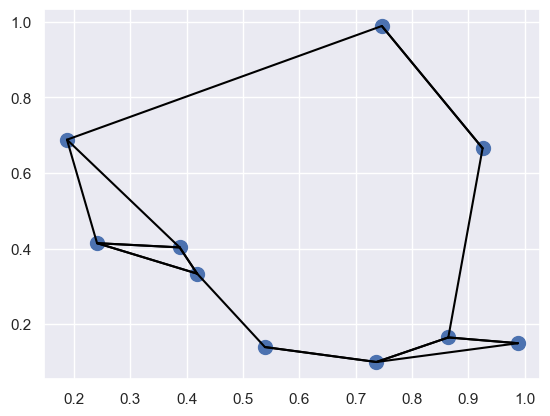

In [42]:
plt.scatter(x[:,0],x[:,1],s=100)
k=2
for i in range(x.shape[0]):
    for j in nearest_partition[i,:K+1]:
        plt.plot(*zip(x[j],x[i]),color='black')

*zip([],[]) do unpacking, like *zip([1,2,3],[4,5,6]) do (1,4),(2,5),(3,6)

Each point in the plot has lines drawn to its two nearest neighbors. At first glance, it might seem strange that some of the points have more than two lines coming out of them: this is due to the fact that if point A is one of the two nearest neighbors of point B, this does not necessarily imply that point B is one of the two nearest neighbors of point A.

Although the broadcasting and row-wise sorting of this approach might seem less straightforward than writing a loop, it turns out to be a very efficient way of operating on this data in Python. You might be tempted to do the same type of operation by manually looping through the data and sorting each set of neighbors individually, but this would almost certainly lead to a slower algorithm than the vectorized version we used. The beauty of this approach is that it's written in a way that's agnostic to the size of the input data: we could just as easily compute the neighbors among 100 or 1,000,000 points in any number of dimensions, and the code would look the same.

Finally, I'll note that when doing very large nearest neighbor searches, there are tree-based and/or approximate algorithms that can scale as O[NlogN]
 or better rather than the O[N2]
 of the brute-force algorithm. One example of this is the KD-Tree,